# Haaste: Tekstin analysointi datatieteestä

> *Tässä muistikirjassa kokeilemme käyttää eri URL-osoitetta - Wikipedia-artikkelia koneoppimisesta. Voit huomata, että toisin kuin datatiede, tämä artikkeli sisältää paljon termejä, mikä tekee analyysistä ongelmallisempaa. Meidän täytyy keksiä toinen tapa siivota dataa avainsanojen poiminnan jälkeen, jotta voimme päästä eroon joistakin yleisistä, mutta merkityksettömistä sanayhdistelmistä.*

Tässä esimerkissä teemme yksinkertaisen harjoituksen, joka kattaa kaikki perinteisen datatieteen prosessin vaiheet. Sinun ei tarvitse kirjoittaa koodia, voit vain klikata alla olevia soluja suorittaaksesi ne ja tarkkailla tulosta. Haasteena sinua kannustetaan kokeilemaan tätä koodia eri datalla.

## Tavoite

Tässä oppitunnissa olemme keskustelleet eri datatieteeseen liittyvistä käsitteistä. Yritetään löytää lisää aiheeseen liittyviä käsitteitä tekemällä **tekstin louhintaa**. Aloitamme tekstillä, joka käsittelee datatiedettä, poimimme siitä avainsanoja ja yritämme sitten visualisoida tuloksen.

Tekstinä käytän Wikipedia-sivua datatieteestä:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Vaihe 1: Datan hankkiminen

Ensimmäinen vaihe jokaisessa datatieteen prosessissa on datan hankkiminen. Käytämme siihen `requests`-kirjastoa:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Vaihe 2: Datan muuntaminen

Seuraava vaihe on muuntaa data käsittelyyn sopivaan muotoon. Meidän tapauksessamme olemme ladanneet HTML-lähdekoodin sivulta, ja meidän täytyy muuntaa se pelkäksi tekstiksi.

Tähän on monia tapoja. Käytämme yksinkertaisinta Pythonin sisäänrakennettua [HTMLParser](https://docs.python.org/3/library/html.parser.html) -objektia. Meidän täytyy periä `HTMLParser`-luokka ja määritellä koodi, joka kerää kaiken tekstin HTML-tägien sisältä, lukuun ottamatta `<script>`- ja `<style>`-tageja.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Vaihe 3: Näkemyksien saaminen

Tärkein vaihe on muuttaa data sellaiseksi, että siitä voidaan saada näkemyksiä. Meidän tapauksessamme haluamme poimia avainsanoja tekstistä ja nähdä, mitkä avainsanat ovat merkityksellisimpiä.

Käytämme Python-kirjastoa nimeltä [RAKE](https://github.com/aneesha/RAKE) avainsanojen poimintaan. Asennetaan ensin tämä kirjasto, jos se ei ole jo asennettuna:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Päätoiminnallisuus on saatavilla `Rake`-objektista, jota voimme mukauttaa joillakin parametreilla. Meidän tapauksessamme asetamme avainsanan vähimmäispituudeksi 5 merkkiä, avainsanan vähimmäisesiintymistiheydeksi dokumentissa 3 ja avainsanan enimmäissanamääräksi 2. Voit vapaasti kokeilla muita arvoja ja tarkkailla tulosta.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Saimme luettelon termeistä yhdessä niiden tärkeysasteen kanssa. Kuten huomaat, tärkeimmät alat, kuten koneoppiminen ja big data, ovat listan kärjessä.

## Vaihe 4: Tulosten visualisointi

Ihmiset ymmärtävät dataa parhaiten visuaalisessa muodossa. Siksi on usein järkevää visualisoida dataa, jotta siitä voidaan tehdä havaintoja. Voimme käyttää Pythonin `matplotlib`-kirjastoa piirtääksemme yksinkertaisen jakauman avainsanoista ja niiden merkityksestä:


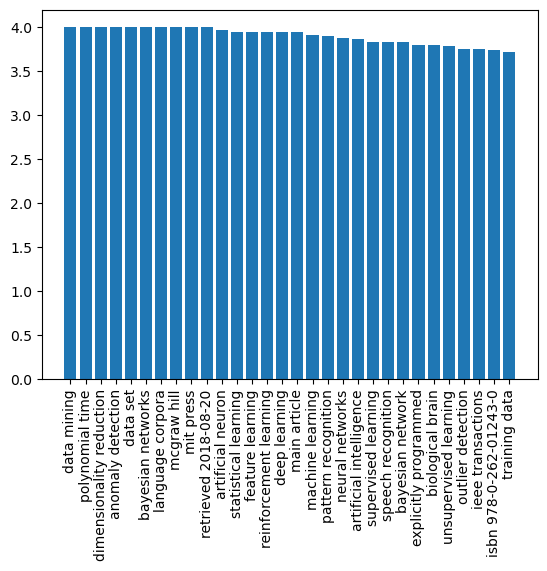

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

On kuitenkin vielä parempi tapa havainnollistaa sanan yleisyyksiä - käyttämällä **Word Cloudia**. Meidän täytyy asentaa toinen kirjasto, jotta voimme piirtää sanapilven avainsanalistastamme.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objekti on vastuussa alkuperäisen tekstin tai valmiiksi lasketun sanalistan ja niiden esiintymistiheyksien vastaanottamisesta ja palauttaa kuvan, joka voidaan sitten näyttää käyttämällä `matplotlib`:


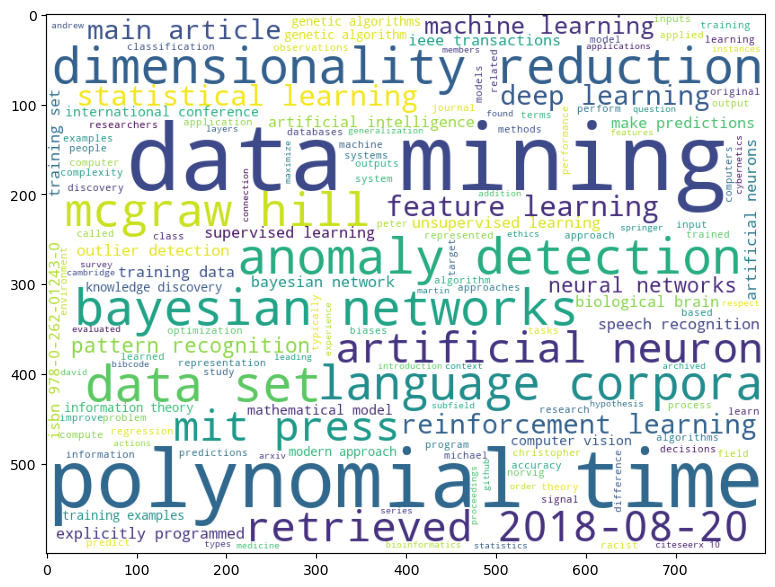

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Voimme myös syöttää alkuperäisen tekstin `WordCloud`-luokkaan - katsotaan, pystymmekö saamaan samanlaisen tuloksen:


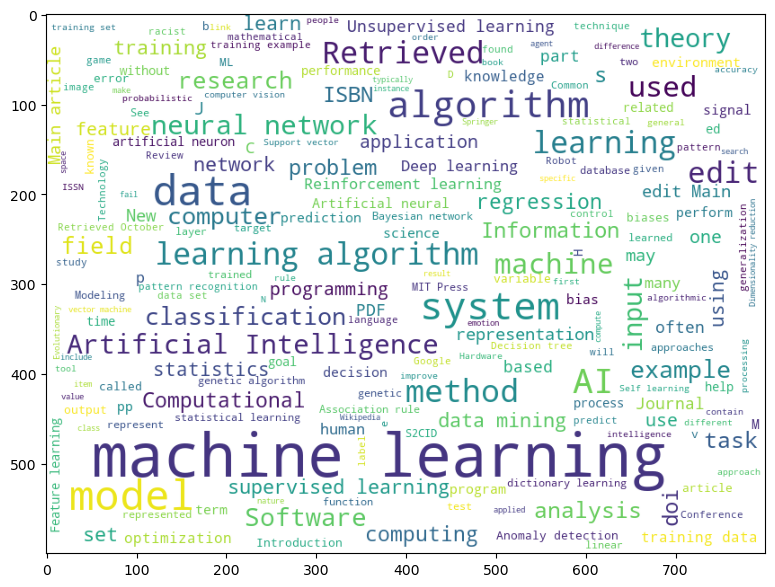

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Voit nähdä, että sanapilvi näyttää nyt vaikuttavammalta, mutta se sisältää myös paljon kohinaa (esim. asiaankuulumattomia sanoja, kuten `Retrieved on`). Lisäksi saamme vähemmän avainsanoja, jotka koostuvat kahdesta sanasta, kuten *data scientist* tai *computer science*. Tämä johtuu siitä, että RAKE-algoritmi tekee paljon paremman työn valitessaan hyviä avainsanoja tekstistä. Tämä esimerkki havainnollistaa, kuinka tärkeää on esikäsitellä ja puhdistaa dataa, koska selkeä lopputulos auttaa meitä tekemään parempia päätöksiä.

Tässä harjoituksessa olemme käyneet läpi yksinkertaisen prosessin, jossa olemme poimineet merkityksiä Wikipedia-tekstistä avainsanojen ja sanapilven muodossa. Tämä esimerkki on melko yksinkertainen, mutta se havainnollistaa hyvin kaikki tyypilliset vaiheet, jotka data-analyytikko käy läpi työskennellessään datan kanssa, alkaen datan hankinnasta aina visualisointiin asti.

Kurssillamme käsittelemme kaikki nämä vaiheet yksityiskohtaisesti.



---

**Vastuuvapauslauseke**:  
Tämä asiakirja on käännetty käyttämällä tekoälypohjaista käännöspalvelua [Co-op Translator](https://github.com/Azure/co-op-translator). Vaikka pyrimme tarkkuuteen, huomioithan, että automaattiset käännökset voivat sisältää virheitä tai epätarkkuuksia. Alkuperäistä asiakirjaa sen alkuperäisellä kielellä tulisi pitää ensisijaisena lähteenä. Kriittisen tiedon osalta suositellaan ammattimaista ihmiskäännöstä. Emme ole vastuussa väärinkäsityksistä tai virhetulkinnoista, jotka johtuvat tämän käännöksen käytöstä.
